In [1]:
#Çok katmanlı sinir ağı
#y = 2x^2 + 8

In [6]:
import neurolab as nl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
!pip install neurolab

  Using cached neurolab-0.3.5.tar.gz (645 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for neurolab: filename=neurolab-0.3.5-py3-none-any.whl size=22179 sha256=315858a46bb3e47478ddb8488adba39a52f81c9223bc3bd9f7ced3f4d3a7fff6
  Stored in directory: c:\users\itu\appdata\local\pip\cache\wheels\1b\58\af\d2068c6542b514cdb26092c053bc6764b834600794e4490219
Successfully built neurolab


You should consider upgrading via the 'c:\users\itu\anaconda3\envs\tf\python.exe -m pip install --upgrade pip' command.


In [7]:
min_val = -30
max_val = 30
num_points = 160
x = np.linspace(min_val, max_val, num_points)
y = 2 * np.square(x) + 8
y /= np.linalg.norm(y)

In [8]:
data = x.reshape(num_points, 1)
labels = y.reshape(num_points, 1)

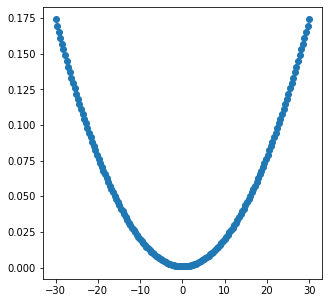

In [10]:
plt.figure(figsize = (5,5))
plt.scatter(data, labels)

In [11]:
neural_net = nl.net.newff([[min_val, max_val]], [10, 6, 1])

In [12]:
neural_net.trainf = nl.train.train_gd

In [13]:
error = neural_net.train(data, labels, epochs = 1000, show = 100, goal = 0.01)

Epoch: 100; Error: 0.04330477520559435;
Epoch: 200; Error: 0.0290434772651594;
Epoch: 300; Error: 0.021982401126657378;
The goal of learning is reached


In [14]:
output = neural_net.sim(data)
y_pred = output.reshape(num_points)

Text(0.5, 1.0, 'Training Error Progress')

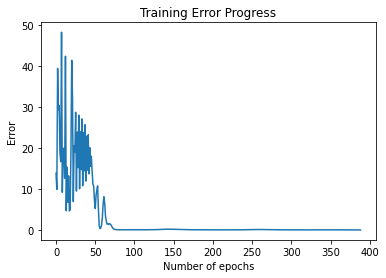

In [15]:
plt.figure()
plt.plot(error)
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.title('Training Error Progress')

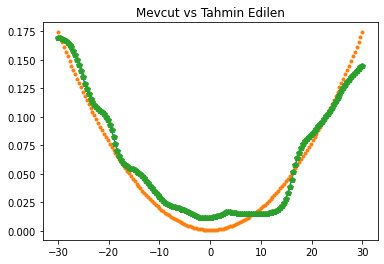

In [16]:
x_dense = np.linspace(min_val, max_val, num_points*2)
y_dense_pred = neural_net.sim(x_dense.reshape(x_dense.size, 1)).reshape(x_dense.size)
plt.figure()
plt.plot(x_dense, y_dense_pred, '-', x, y, '.', x, y_pred, 'p')
plt.title('Mevcut vs Tahmin Edilen')
plt.show()

In [17]:
!pip show tensorflow

Name: tensorflow
Version: 1.14.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\itu\appdata\roaming\python\python36\site-packages
Requires: absl-py, astor, gast, google-pasta, grpcio, keras-applications, keras-preprocessing, numpy, protobuf, six, tensorboard, tensorflow-estimator, termcolor, wheel, wrapt
Required-by: 


In [22]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf

In [24]:
matrix1 = np.array([(2,2,2), (2,2,2), (2,2,2)], dtype = 'int32')
matrix2 = np.array([(1,1,1), (1,1,1), (1,1,1)], dtype = 'int32')
print(matrix1)
print(matrix2)

matrix1 = tf.constant(matrix1)
matrix2 = tf.constant(matrix2)
matrix_product = tf.matmul(matrix1, matrix2)
matrix_sum = tf.add(matrix1, matrix2)

matrix3 = np.array([(2,7,2), (1,4,2), (9,0,2)], dtype = 'float32')
print(matrix3)
matrix_det = tf.matrix_determinant(matrix3)

with tf.Session() as sess:
    result1 = sess.run(matrix_product)
    result2 = sess.run(matrix_sum)
    result3 = sess.run(matrix_det)
    
print(result1)
print(result2)
print(result3)

[[2 2 2]
 [2 2 2]
 [2 2 2]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[2. 7. 2.]
 [1. 4. 2.]
 [9. 0. 2.]]
[[6 6 6]
 [6 6 6]
 [6 6 6]]
[[3 3 3]
 [3 3 3]
 [3 3 3]]
55.999992


In [26]:
#Kategorik Verileri Sayısal (Numerical) Verilere Dönüştürme

In [27]:
#Tam Sayı Kodlaması (Integer(Label) Encoding)
#One-hot encoding
"""
red green blue
1    0     0
0    1     0
0    0     1
"""

'\nred green blue\n1    0     0\n0    1     0\n0    0     1\n'

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [29]:
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = np.array(data)
print(values)

['cold' 'cold' 'warm' 'cold' 'hot' 'hot' 'warm' 'cold' 'warm' 'hot']


In [31]:
#integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

[0 0 2 0 1 1 2 0 2 1]


In [33]:
#binary (one-hot) encode
onehot_encoder = OneHotEncoder(sparse = False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [35]:
#Geriye Dönüş Mümkün müdür?
inverted = label_encoder.inverse_transform([np.argmax(onehot_encoded[0, :])])
print(inverted)

['cold']


In [36]:
#SLP (Single Layer Perceptron) - Tek Katmanlı Algılayıcı

In [2]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/data", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /data\t10k-images-idx3-ubyte.gz
Extracting /data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch: 0001 cost: 1.176784991
Epoch: 0002 cost: 0.662674803
Epoch: 0003 cost: 0.550659152
Epoch: 0004 cost: 0.496749705
Epoch: 0005 cost: 0.463719451
Epoch: 0006 cost: 0.440954023
Epoch: 0007 cost: 0.423916210
Epoch: 0008 cost: 0.410700619
Epoch: 0009 cost: 0.399873262
Epoch: 0010 cost: 0.390885046
Epoch: 0011 cost: 0.383347241
Epoch: 0012 cost: 0.376752988
Epoch: 0013 cost: 0.371031917
Epoch: 0014 cost: 0.365944698
Epoch: 0015 cost: 0.361406467
Epoch: 0016 cost: 0.357251494
Epoch: 0017 cost: 0.353547690
Epoch: 0018 cost: 0.350167270
Epoch: 0019 cost: 0.347018686
Epoch: 0020 cost: 0.344181830
Epoch: 0021 cost: 0.341454976
Epoch: 0022 cost: 0.338977547
Epoch: 0023 cost: 0.336671385
Epoch: 0024 cost: 0.334502699
Epoch: 0025 cost: 0.332465594
Eğitim fazı tamamlandı


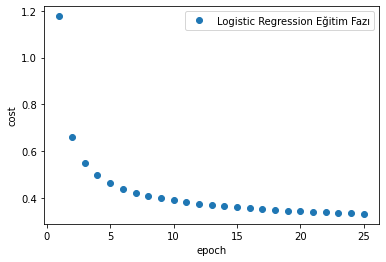

Model accuracy : 0.9148


In [3]:
#Parametreler
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1

x = tf.placeholder("float", [None, 784])
y = tf.placeholder("float", [None, 10])

#Model oluşturma
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

activation = tf.nn.softmax(tf.matmul(x, W) + b)

#Hata minimizasyon işlemleri
cross_entropy = y*tf.log(activation)
cost = tf.reduce_mean(-tf.reduce_sum(cross_entropy, reduction_indices = 1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

#Çizim ayarları
avg_set = []
epoch_set = []

#değişkenlerin ilk atamalarını yapma işlemi
init = tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples/batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
            sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys})
            
            avg_cost += sess.run(cost, feed_dict={x: batch_xs, y: batch_ys}) / total_batch
            
            
        #her bir epoch için logları gösterme
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost:","{:.9f}".format(avg_cost))
        avg_set.append(avg_cost)
        epoch_set.append(epoch+1)
        
    print("Eğitim fazı tamamlandı")
    
    plt.plot(epoch_set, avg_set, 'o', label = 'Logistic Regression Eğitim Fazı')
    plt.ylabel('cost')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()
    
    dogru_tahmin = tf.equal(tf.argmax(activation, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(dogru_tahmin, "float"))
    print("Model accuracy :", accuracy.eval({x : mnist.test.images, y : mnist.test.labels}))

Extracting /MNIST_data\train-images-idx3-ubyte.gz
Extracting /MNIST_data\train-labels-idx1-ubyte.gz
Extracting /MNIST_data\t10k-images-idx3-ubyte.gz
Extracting /MNIST_data\t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost: 0.346337156
Epoch: 0002 cost: 0.108482351
Epoch: 0003 cost: 0.076350670
Epoch: 0004 cost: 0.059892639
Epoch: 0005 cost: 0.048970041
Epoch: 0006 cost: 0.040996263
Epoch: 0007 cost: 0.034781992
Epoch: 0008 cost: 0.029617078
Epoch: 0009 cost: 0.025432256
Epoch: 0010 cost: 0.021872075
Epoch: 0011 cost: 0.018948143
Epoch: 0012 cost: 0.016262600
Epoch: 0013 cost: 0.013983955
Epoch: 0014 cost: 0.012130996
Epoch: 0015 cost: 0.010386098
Epoch: 0016 cost: 0.008962604
Epoch: 0017 cost: 0.007720599
Epoch: 0018 cost: 0.006523904
Epoch: 0019 cost: 0.005593288
Epoch: 0020 cost: 0.004807320
Eğitim fazı tamamlandı


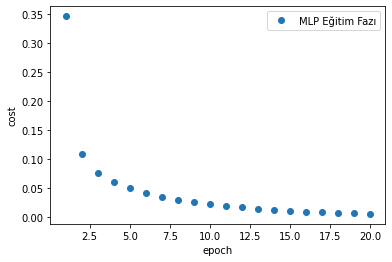

Model accuracy: 0.9543


In [9]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/MNIST_data", one_hot = True)

import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#parametreler
learning_rate = 0.001
training_epochs = 20
batch_size = 100
display_step = 1

n_hidden_1 = 256
n_hidden_2 = 256
n_input = 784
n_classes = 10

x = tf.placeholder("float", [None, n_input]) #data
y = tf.placeholder("float", [None, n_classes]) #labels

h = tf.Variable(tf.random.normal([n_input, n_hidden_1]))
bias_layer_1 = tf.Variable(tf.random.normal([n_hidden_1]))
layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, h), bias_layer_1))


w = tf.Variable(tf.random.normal([n_hidden_1, n_hidden_2]))
bias_layer_2 = tf.Variable(tf.random.normal([n_hidden_2]))
layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, w), bias_layer_2))


output = tf.Variable(tf.random.normal([n_hidden_2, n_classes]))
bias_output = tf.Variable(tf.random.normal([n_classes]))
output_layer = tf.matmul(layer_2, output) + bias_output


cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = output_layer, labels = y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

#Çizim ayarları
avg_set = []
epoch_set = []

init = tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
            sess.run(optimizer, feed_dict = {x: batch_xs, y: batch_ys})
            
            avg_cost += sess.run(cost, feed_dict = {x: batch_xs, y: batch_ys}) / total_batch
        
        
        #her bir epoch için logları gösterme 
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch + 1), "cost:", "{:.9f}".format(avg_cost))
        avg_set.append(avg_cost)
        epoch_set.append(epoch + 1)
        
    print("Eğitim fazı tamamlandı")
    
    plt.plot(epoch_set, avg_set, 'o', label = 'MLP Eğitim Fazı')
    plt.ylabel('cost')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()
    
    dogru_tahmin = tf.equal(tf.argmax(output_layer, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(dogru_tahmin, "float"))
    print("Model accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))